In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import yaml

In [2]:
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{68}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{70}/metrics.csv')

#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{72}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{87}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{96}/metrics.csv')



In [3]:
the_dir = "example_results/lightning_logs/test_different_seed_oct/version_0"

df = pd.read_csv(os.path.join(the_dir, 'metrics.csv'))
df

,val_f1,val_cc,val_loss,lr-SGD,val_acc,epoch,val_prec,step,train_f1,train_cc,train_acc,train_prec,unpruned,unpruned_state,train_loss,test_loss,test_acc,test_f1,test_prec,test_cc
0,NaN,NaN,NaN,0.00100,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.626953,24.002697,1.071419,NaN,0.626953,0.0,0.401974,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,31,0.536133,24.002697,0.536133,0.324770,5980.0,-1.0,1.175209,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.00100,NaN,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.642578,24.002697,0.990137,NaN,0.642578,1.0,0.382568,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,NaN,NaN,NaN,NaN,NaN,98.0,NaN,3167,0.635498,24.127312,0.635498,0.416744,2906.0,-1.0,1.000098,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,0.00001,NaN,NaN,NaN,3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,0.601562,24.127312,1.048095,NaN,0.601562,99.0,0.407909,3199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,99.0,NaN,3199,0.635254,24.127312,0.635254,0.416027,2906.0,1.0,1.000007,NaN,NaN,NaN,NaN,NaN


In [4]:
stream = open(os.path.join(the_dir, 'hparams.yaml'), 'r')
data = yaml.load(stream, Loader=yaml.Loader)
data

{'kwargs': {'model_kwargs': {'base_lr': 0.001,
   'cc_metric': 'l2',
   'cc_weight': 50,
   'ci_metric': 'l2',
   'cm_metric': 'not implemented yet',
   'criterion': CrossEntropyLoss(),
   'grid_size': 324,
   'lr_update': 100,
   'min_lr': 1e-05,
   'momentum': 0.9,
   'n_classes': 4,
   'optimizer': 'sgd',
   'out_dim': [1, 8, 16, 32, 4],
   'pretrain_epochs': 15,
   'prune_keep': 0.95,
   'prune_keep_total': 0.5,
   'update_every_nth_epoch': 5},
  'train_kwargs': {'batch_size': 128,
   'device': 'cuda',
   'epochs': 100,
   'exp_name': 'test_different_seed_oct',
   'img_size': 28,
   'load_ckpt_file': '',
   'log_every_n_steps': 4,
   'num_workers': 18,
   'result_path': 'examples/example_results',
   'test_size': 24,
   'train_size': 4096,
   'val_size': 512}},
 'log_dir': 'examples/example_results\\lightning_logs\\test_different_seed_oct\\version_0'}

In [5]:
cc_metric = data['kwargs']['model_kwargs']['cc_metric']

In [6]:
ci_metric = data['kwargs']['model_kwargs']['ci_metric']

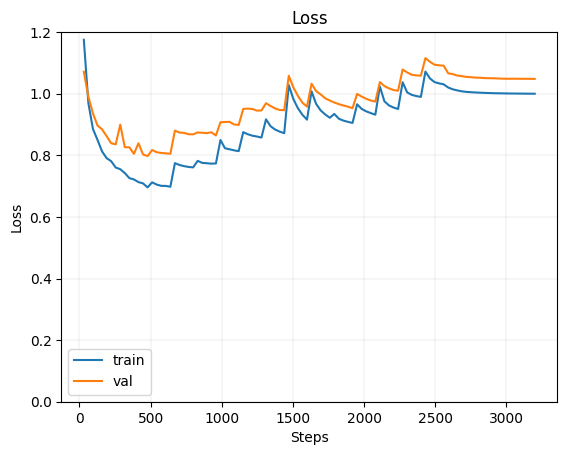

In [7]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_loss']

train_df = df[['step', 'train_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_loss.png'))

# Show the plot
plt.show()



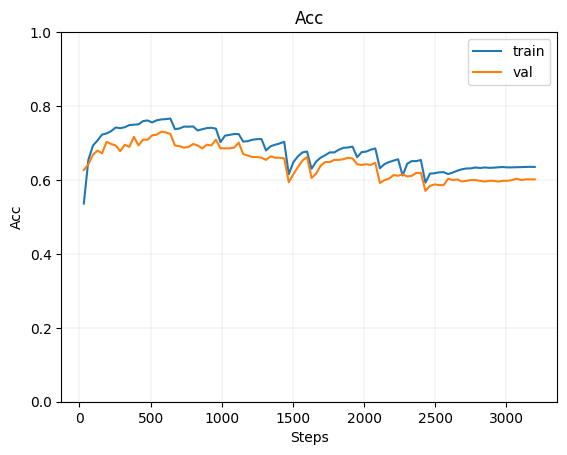

In [8]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_acc']].dropna()
x_val = val_df['step']
y_val = val_df['val_acc']

train_df = df[['step', 'train_acc']].dropna()
x_train = train_df['step']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Acc')
plt.title('Acc')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_acc.png'))


# Show the plot
plt.show()


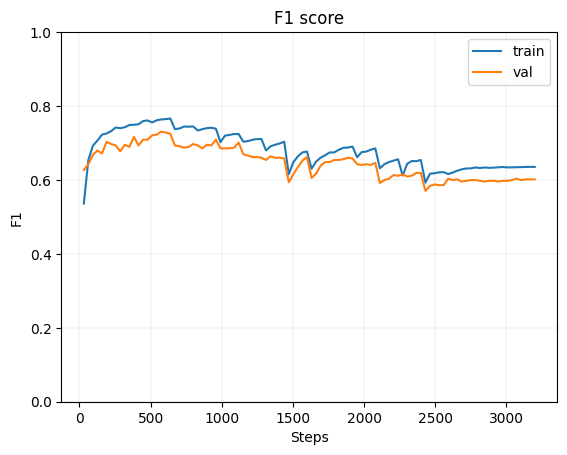

In [9]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1']

train_df = df[['step', 'train_f1']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_f1.png'))

# Show the plot
plt.show()


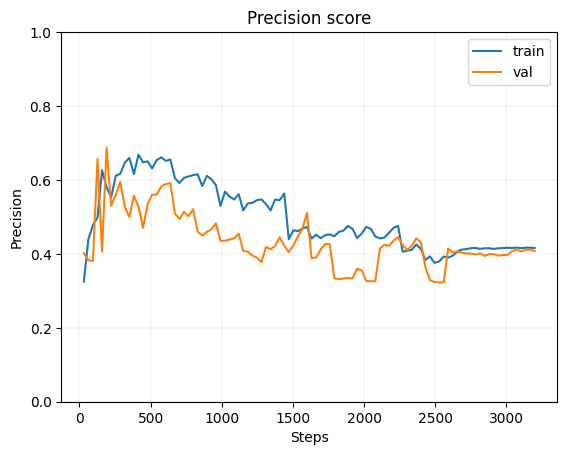

In [10]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_prec']].dropna()
x_val = val_df['step']
y_val = val_df['val_prec']

train_df = df[['step', 'train_prec']].dropna()
x_train = train_df['step']
y_train = train_df['train_prec']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_prec.png'))


# Show the plot
plt.show()


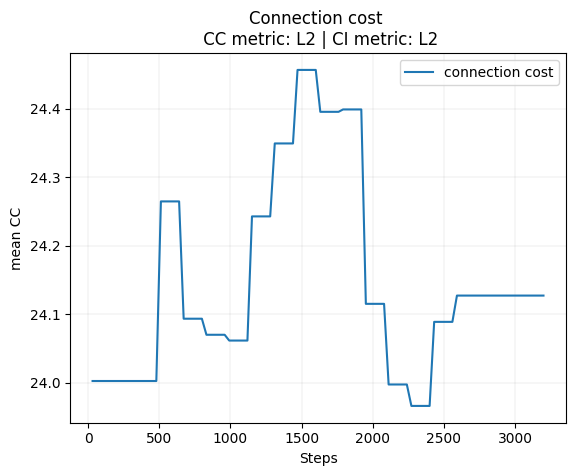

In [11]:
import matplotlib.pyplot as plt

train_df = df[['step', 'train_cc']].dropna()
x_train = train_df['step']
y_train = train_df['train_cc']


# Create a line plot
plt.plot(x_train, y_train, label="connection cost")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('mean CC')
plt.title(f'Connection cost \n CC metric: {cc_metric.upper()} | CI metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_cc.png'))


# Show the plot
plt.show()


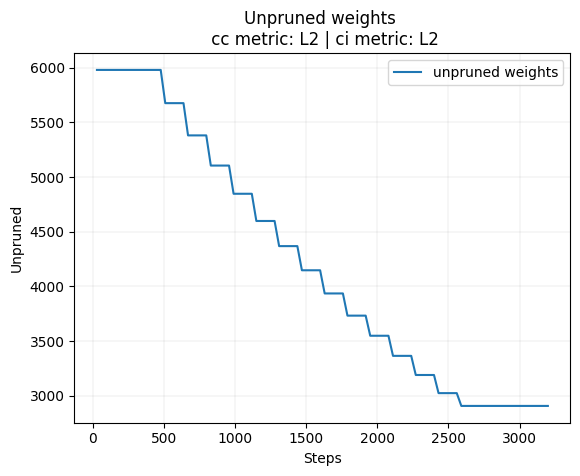

In [12]:
import matplotlib.pyplot as plt

train_df = df[['step', 'unpruned']].dropna()
x_train = train_df['step']
y_train = train_df['unpruned']


# Create a line plot
plt.plot(x_train, y_train, label="unpruned weights")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Unpruned')
plt.title(f'Unpruned weights \n cc metric: {cc_metric.upper()} | ci metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_unpruned.png'))


# Show the plot
plt.show()


In [13]:
val_df

,step,val_prec
1,31,0.401974
4,63,0.382568
7,95,0.380643
10,127,0.657014
13,159,0.405945
...,...,...
286,3071,0.412128
289,3103,0.406761
292,3135,0.411321
295,3167,0.411321


In [14]:
40*300

12000

In [15]:
list(set(df['step']))

[0,
 512,
 1024,
 1536,
 2048,
 2560,
 3072,
 2751,
 1023,
 31,
 32,
 543,
 544,
 1055,
 1056,
 1567,
 1568,
 2079,
 2080,
 2592,
 1535,
 2655,
 2047,
 3167,
 63,
 64,
 575,
 576,
 1087,
 1088,
 1599,
 1600,
 2111,
 2112,
 2624,
 3168,
 2559,
 3071,
 95,
 1120,
 96,
 607,
 608,
 1119,
 1631,
 1632,
 2143,
 2144,
 2656,
 2975,
 639,
 128,
 640,
 1151,
 1152,
 127,
 1663,
 1664,
 2175,
 2176,
 2688,
 2879,
 159,
 160,
 672,
 671,
 1183,
 1184,
 1695,
 1696,
 2207,
 2208,
 2720,
 2783,
 191,
 192,
 704,
 703,
 1215,
 1216,
 1727,
 1728,
 2239,
 2240,
 2752,
 2687,
 223,
 224,
 736,
 735,
 1247,
 1248,
 1759,
 1760,
 2271,
 2272,
 2784,
 2591,
 3103,
 767,
 256,
 768,
 255,
 1279,
 1280,
 1791,
 1792,
 2303,
 2304,
 2816,
 3104,
 3007,
 287,
 288,
 799,
 800,
 1311,
 1312,
 1823,
 1824,
 2335,
 2336,
 2848,
 2911,
 319,
 320,
 831,
 832,
 1343,
 1344,
 1855,
 1856,
 2367,
 2368,
 2880,
 2815,
 351,
 352,
 864,
 863,
 1375,
 1376,
 1887,
 1888,
 2399,
 2400,
 2912,
 2719,
 383,
 384,
 896,


In [16]:
df['val_loss'].dropna()

1      1.071419
4      0.990137
7      0.936236
10     0.896916
13     0.884403
         ...   
286    1.048646
289    1.048415
292    1.048435
295    1.048427
298    1.048095
Name: val_loss, Length: 100, dtype: float64